# Independence of Errors

## Explanation:

- Definition: The residuals (errors) from the regression model should be independent of each other. This means that the error for one observation should not influence or be correlated with the error of another observation.
- Why It Matters: If the errors are correlated, it suggests that there is some pattern in the data that the model has not captured. This can lead to biased estimates of the regression coefficients, and the standard errors of these coefficients might be underestimated, leading to overconfident statistical inferences.


## How to Check:

- Durbin-Watson Test: One of the most common tests for detecting autocorrelation (correlation between residuals) is the Durbin-Watson test. The test statistic ranges from 0 to 4, where:
    - ~0 positive correlation
    - ~2 no correlation
    - ~4 negative correlation
- Time Series Data: If you're dealing with time series data, it's especially important to check for autocorrelation, as consecutive observations are often correlated. In such cases, techniques like ARIMA or incorporating lag variables might be necessary.

## Example:

Suppose you're modeling the sales of a product over time, and the errors are positively autocorrelated. This could mean that if sales were over-predicted in one month, they're likely to be over-predicted in the next month as well, which could distort the model’s predictions.

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic data
n = 100
x = np.linspace(0, 10, n)  # Independent variable

# Generate autocorrelated errors (AR(1) process)
rho = 0.9  # Autocorrelation coefficient
errors = np.zeros(n)
errors[0] = np.random.normal(0, 1)
for i in range(1, n):
    errors[i] = rho * errors[i-1] + np.random.normal(0, 1)

# Create the dependent variable with a linear relationship plus autocorrelated errors
y = 2 * x + errors

# Step 2: Fit a linear regression model
X = sm.add_constant(x)  # Add intercept
model = sm.OLS(y, X).fit()

# Step 3: Calculate residuals
residuals = model.resid

# Step 4: Perform Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.2f}")

Durbin-Watson statistic: 0.23


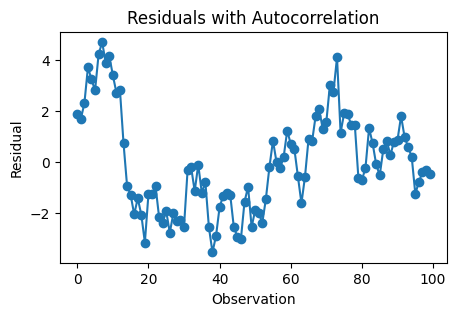

In [5]:

# Step 5: Plot the residuals to visually inspect for autocorrelation
plt.figure(figsize=(5, 3))
plt.plot(residuals, marker='o', linestyle='-')
plt.title('Residuals with Autocorrelation')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()